# One-Run Simulator (single graph)

Runs the Simulator once on a single randomly generated factor graph, mirroring `main.py` but with just one graph.


In [ ]:
import numpy as np
import random
import time
import pickle

from propflow.simulator import Simulator
from propflow.utils.fg_utils import FGBuilder
from propflow.configs.global_config_mapping import (
    CTFactory,
    get_ct_factory,
    SIMULATOR_DEFAULTS,
    POLICY_DEFAULTS,
    ENGINE_DEFAULTS,
)
from propflow.bp.engines import (
    BPEngine,
    DampingSCFGEngine,
    SplitEngine,
)

SEED = 42
np.random.seed(SEED)
random.seed(SEED)


In [4]:
# Build a single random factor graph (smaller than main for speed)
ct_factory_fn = CTFactory.random_int.fn  # or get_ct_factory(CTFactory.random_int)
fg = FGBuilder.build_random_graph(
    num_vars=10,
    domain_size=5,
    ct_factory=ct_factory_fn,
    ct_params={"low": 1, "high": 5},
    density=0.3,
)
fg


In [5]:
# Engine configurations (mirrors main.py with fewer defaults)
engine_configs = {
    "BPEngine": {"class": BPEngine},
    "DampingSCFGEngine_symmetric": {
        "class": DampingSCFGEngine,
        "damping_factor": POLICY_DEFAULTS["damping_factor"],
        "split_factor": POLICY_DEFAULTS["split_factor"],
    },
    "Split_0.5": {
        "class": SplitEngine,
        "split_factor": POLICY_DEFAULTS["split_factor"],
    },
}

MAX_ITER = ENGINE_DEFAULTS["max_iterations"]
LOG_LEVEL = SIMULATOR_DEFAULTS["default_log_level"]
simulator = Simulator(engine_configs, log_level=LOG_LEVEL)


In [6]:
# Run a single simulator invocation on just this one graph
start_time = time.time()

# Build the simulator args explicitly and run sequentially for notebook stability
graph_index = 0
simulation_args = []
fg_bytes = pickle.dumps(fg)
for engine_name, config in engine_configs.items():
    simulation_args.append((graph_index, engine_name, config, fg_bytes, MAX_ITER, simulator.logger.level))

results_list = simulator._sequential_fallback(simulation_args)

# Populate results like run_simulations would
for graph_index, engine_name, costs in results_list:
    simulator.results[engine_name].append(costs)

elapsed = time.time() - start_time
print(f"Completed one run across {len(engine_configs)} engines in {elapsed:.2f}s")
simulator.results


2025-08-29 16:08:16,574 - Simulator - Running all simulations sequentially as a last resort.
2025-08-29 16:08:16,693 - Simulator-p37988 - Finished simulation for graph 0, engine BPEngine. Final cost: 29.0
2025-08-29 16:08:17,178 - Simulator-p37988 - Finished simulation for graph 0, engine DampingSCFGEngine_symmetric. Final cost: 29.0
2025-08-29 16:08:18,968 - Simulator-p37988 - Finished simulation for graph 0, engine Split_0.5. Final cost: 38.0
Completed one run across 3 engines in 2.40s


{'BPEngine': [[np.float64(37.0),
   np.float64(36.0),
   np.float64(38.0),
   np.float64(32.0),
   np.float64(38.0),
   np.float64(39.0),
   np.float64(43.0),
   np.float64(45.0),
   np.float64(37.0),
   np.float64(29.0),
   np.float64(33.0),
   np.float64(30.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
   np.float64(29.0),
 

2025-08-29 16:09:13,322 - Simulator - Starting plotting... (Verbose: False)
2025-08-29 16:09:13,376 - Simulator - Plotted BPEngine: avg final cost = 29.00
2025-08-29 16:09:13,379 - Simulator - Plotted DampingSCFGEngine_symmetric: avg final cost = 29.00
2025-08-29 16:09:13,383 - Simulator - Plotted Split_0.5: avg final cost = 38.00


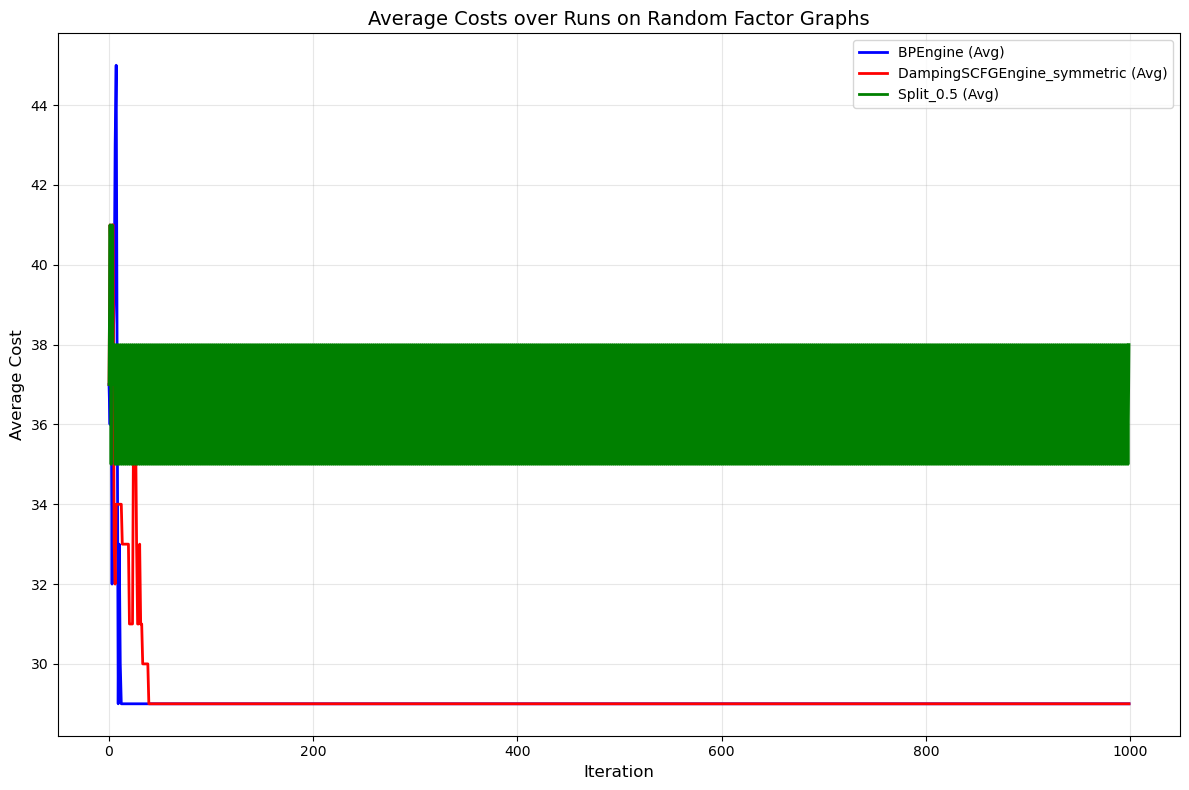

2025-08-29 16:09:13,731 - Simulator - Displaying plot.


In [7]:
# Plot the results for this single-graph run
simulator.plot_results(max_iter=MAX_ITER, verbose=False)
